# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from pylab import rcParams
import itertools
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns',None)

# Reading CSV File

In [3]:
energy = pd.read_csv("Monthly Electricity Consumption.csv")
energy.head(5)

,Country,Date,Total Combustible Fuels,"Coal, Peat and Manufactured Gases",Oil and Petroleum Products,Natural Gas,"Total Renewables (Geo, Solar, Wind, Other)",Electricity
0,Australia,2018-01,18689.1161,13464.1241,393.5661,4539.9566,3346.2606,21462.0537
1,Austria,2018-01,2143.5107,402.4166,67.5202,1210.7455,4834.3742,6228.2236
2,Belgium,2018-01,2359.4667,152.9829,23.0304,1578.2394,1652.2486,7720.7645
3,Canada,2018-01,11910.4493,4301.0542,560.2695,6082.7295,44476.4310,56441.8133
4,Chile,2018-01,4235.3689,2783.8212,65.9419,816.8240,3362.5065,6716.9600


In [4]:
energy.isna().sum()

Country                                         0
Date                                            0
Total Combustible Fuels                         0
Coal, Peat and Manufactured Gases             401
Oil and Petroleum Products                    186
Natural Gas                                   142
Total Renewables (Geo, Solar, Wind, Other)      2
Electricity                                     0
dtype: int64

In [5]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 8 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     2535 non-null   object 
 1   Date                                        2535 non-null   object 
 2   Total Combustible Fuels                     2535 non-null   float64
 3   Coal, Peat and Manufactured Gases           2134 non-null   float64
 4   Oil and Petroleum Products                  2349 non-null   float64
 5   Natural Gas                                 2393 non-null   float64
 6   Total Renewables (Geo, Solar, Wind, Other)  2533 non-null   float64
 7   Electricity                                 2535 non-null   float64
dtypes: float64(6), object(2)
memory usage: 158.6+ KB


# Removing all NA values with Mean value

In [6]:
energy['Coal, Peat and Manufactured Gases']. fillna(energy['Coal, Peat and Manufactured Gases'].mean(), inplace=True)
energy['Oil and Petroleum Products']. fillna(energy['Oil and Petroleum Products'].mean(), inplace=True)
energy['Natural Gas']. fillna(energy['Natural Gas'].mean(), inplace=True)
energy['Total Renewables (Geo, Solar, Wind, Other)'].fillna(energy['Total Renewables (Geo, Solar, Wind, Other)'].mean(),inplace=True)

In [7]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 8 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     2535 non-null   object 
 1   Date                                        2535 non-null   object 
 2   Total Combustible Fuels                     2535 non-null   float64
 3   Coal, Peat and Manufactured Gases           2535 non-null   float64
 4   Oil and Petroleum Products                  2535 non-null   float64
 5   Natural Gas                                 2535 non-null   float64
 6   Total Renewables (Geo, Solar, Wind, Other)  2535 non-null   float64
 7   Electricity                                 2535 non-null   float64
dtypes: float64(6), object(2)
memory usage: 158.6+ KB


In [8]:
energy.describe()

,Total Combustible Fuels,"Coal, Peat and Manufactured Gases",Oil and Petroleum Products,Natural Gas,"Total Renewables (Geo, Solar, Wind, Other)",Electricity
count,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000
mean,22143.324143,17271.599667,438.862363,6542.319997,11051.563126,35543.712280
std,69248.579222,59137.056759,881.900726,18895.315804,28117.777585,101967.612145
min,0.028600,0.025100,-267.081900,0.000000,9.963500,101.218400
25%,506.931700,291.904600,9.435450,177.389100,790.398500,2472.261000
50%,2139.092200,1419.400700,84.651400,1237.975600,2787.143600,6059.268000
75%,11400.561450,17271.599667,438.862363,6542.319997,8973.067450,22875.981100
max,556585.578800,518019.007100,10517.604400,182652.960600,266762.951300,772327.471600


In [9]:
energy.corr()

,Total Combustible Fuels,"Coal, Peat and Manufactured Gases",Oil and Petroleum Products,Natural Gas,"Total Renewables (Geo, Solar, Wind, Other)",Electricity
Total Combustible Fuels,1.000000,0.951160,0.357872,0.533135,0.927213,0.985139
"Coal, Peat and Manufactured Gases",0.951160,1.000000,0.180283,0.268188,0.906717,0.931191
Oil and Petroleum Products,0.357872,0.180283,1.000000,0.612454,0.278952,0.349214
Natural Gas,0.533135,0.268188,0.612454,1.000000,0.402850,0.538972
"Total Renewables (Geo, Solar, Wind, Other)",0.927213,0.906717,0.278952,0.402850,1.000000,0.947782
Electricity,0.985139,0.931191,0.349214,0.538972,0.947782,1.000000


# Correlation and heatmap of all features

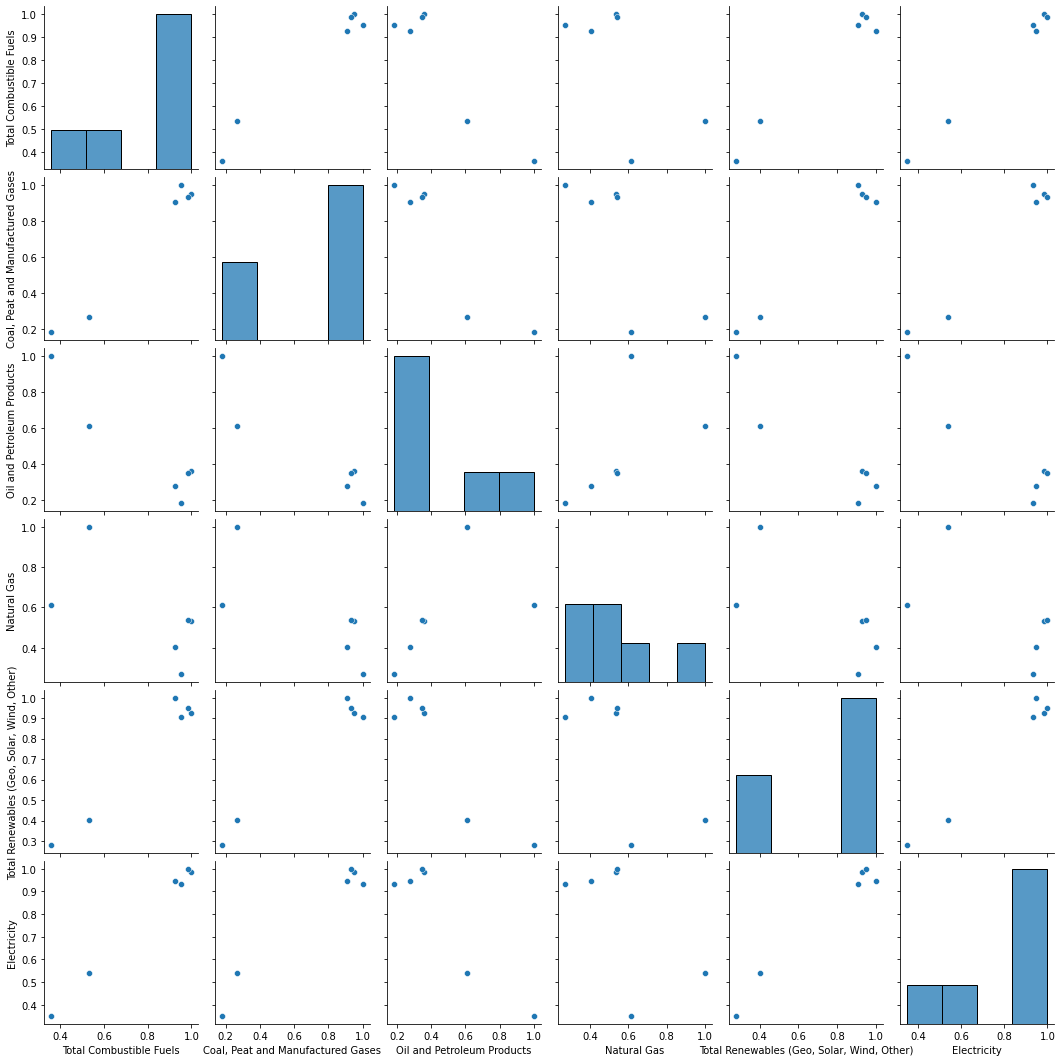

In [10]:
sns.pairplot(energy.corr())

<AxesSubplot:>

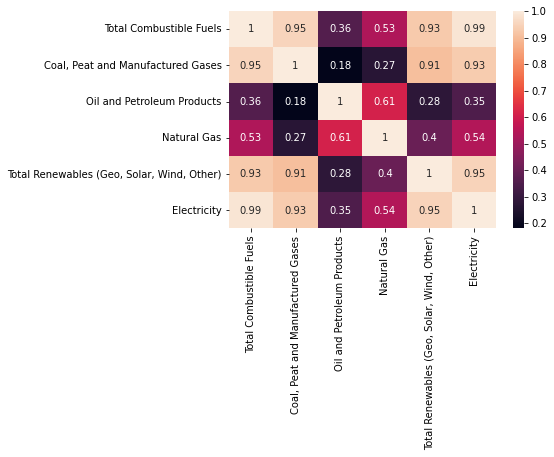

In [11]:
sns.heatmap(energy.corr(),annot = True)

# Train Test Split

In [12]:
from sklearn.model_selection import train_test_split

x = energy[['Total Combustible Fuels','Coal, Peat and Manufactured Gases', 
            'Oil and Petroleum Products','Natural Gas', 
            'Electricity']]
y = energy[['Total Renewables (Geo, Solar, Wind, Other)']]

print ("x.shape = ", x.shape)
print ("y.shape = ", y.shape)

x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.2)
print()
print ("x_train :" , x_train.shape)
print ("x_test :", x_test.shape)
print ("y_train :", y_train.shape)
print ("y_test :", y_test.shape)

x.shape =  (2535, 5)
y.shape =  (2535, 1)

x_train : (2028, 5)
x_test : (507, 5)
y_train : (2028, 1)
y_test : (507, 1)


# Linear Regression, Random Forest & Decision Tree Regressor

In [13]:
import time
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report, confusion_matrix

algorithms = [LinearRegression(),
              RandomForestRegressor(),
              GradientBoostingRegressor(),
              DecisionTreeRegressor()
             ]
labels = np.unique(y)
    
for algo in algorithms:
    print ()
    print ("============== Running {} ==============".format(algo))
    t1 = time.perf_counter()
    model = algo.fit(x_train, np.ravel(y_train))
    t2 = time.perf_counter()
    y_pred_test = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    t3 = time.perf_counter()
  
    print ("Training time : {:,.2f} secs ({:,.1f} ms)".format ( (t2-t1), (t2-t1)*1e3))
    print ("Prediction time : {:,.2f} secs ({:,.1f} ms)".format ( (t3-t2), (t3-t2)*1e3))
    print ("Training R2 : {:,.2f}".format (r2_score(y_train, y_pred_train)))
    print ("Testing R2  : {:,.2f}".format (r2_score(y_test, y_pred_test)))
    print ("Training RMSE : {:,.2f}".format (sqrt(mean_squared_error(y_train, y_pred_train))))
    print ("Testing RMSE  : {:,.2f}".format (sqrt(mean_squared_error(y_test, y_pred_test))))


============== Running LinearRegression() ==============
Training time : 0.01 secs (8.6 ms)
Prediction time : 0.01 secs (6.5 ms)
Training R2 : 0.91
Testing R2  : 0.94
Training RMSE : 8,442.23
Testing RMSE  : 6,629.98

============== Running RandomForestRegressor() ==============
Training time : 1.20 secs (1,202.8 ms)
Prediction time : 0.08 secs (82.6 ms)
Training R2 : 1.00
Testing R2  : 0.99
Training RMSE : 1,593.95
Testing RMSE  : 2,974.32

============== Running GradientBoostingRegressor() ==============
Training time : 0.42 secs (418.4 ms)
Prediction time : 0.01 secs (7.3 ms)
Training R2 : 0.99
Testing R2  : 0.98
Training RMSE : 2,253.59
Testing RMSE  : 3,529.91

============== Running DecisionTreeRegressor() ==============
Training time : 0.02 secs (17.8 ms)
Prediction time : 0.00 secs (3.1 ms)
Training R2 : 1.00
Testing R2  : 0.96
Training RMSE : 0.00
Testing RMSE  : 5,254.13


In [14]:
algorithms = LinearRegression().fit(x_train, y_train)
slope = algorithms.coef_
print("Slope: ", slope)
intercept = algorithms.intercept_
print("Intercept: ", intercept)

Slope:  [[ 0.08509685 -0.11940293  0.70240852 -0.37145712  0.30226819]]
Intercept:  [2576.0506844]


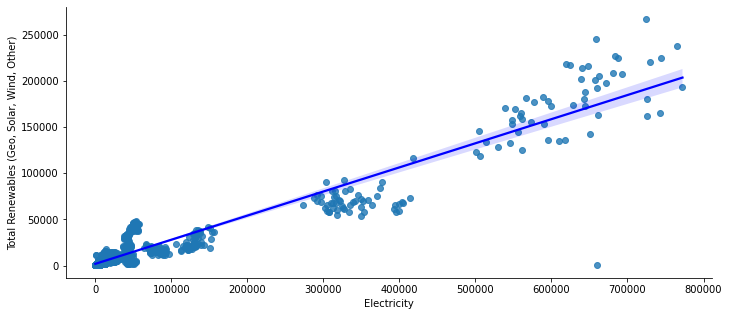

In [15]:
a = sns.pairplot(energy, x_vars = "Electricity",y_vars = "Total Renewables (Geo, Solar, Wind, Other)", kind = "reg", 
                 plot_kws = {'line_kws':{'color':'blue'}})
a.fig.set_size_inches(15,5)

# Pairplot of all features with regression line

<Figure size 1440x720 with 0 Axes>

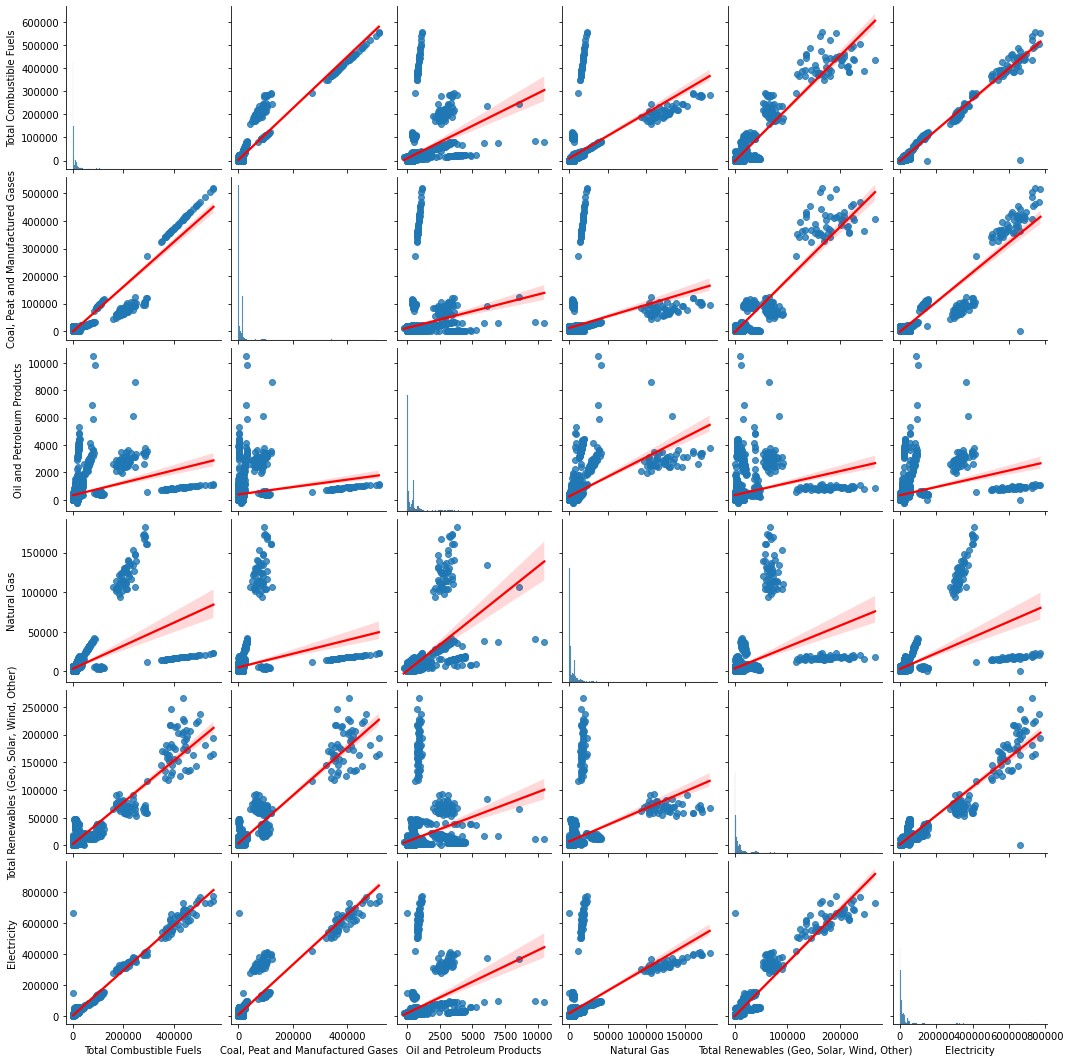

In [16]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(20)
sns.pairplot(energy, kind = "reg",plot_kws = {'line_kws':{'color':'red'}})

<AxesSubplot:xlabel='Electricity'>

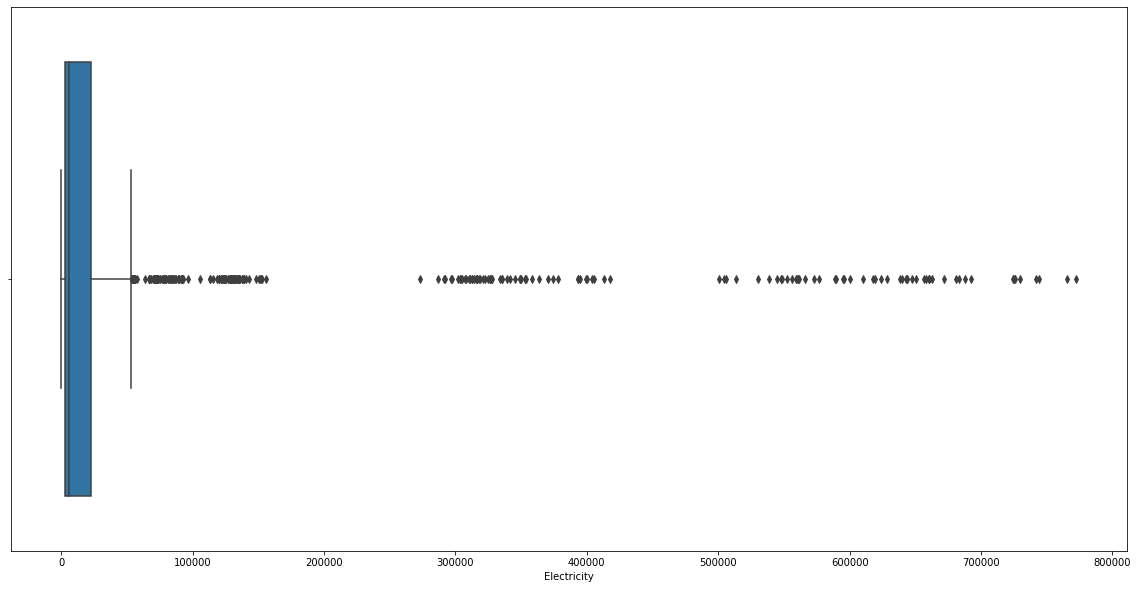

In [17]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(20)
sns.boxplot(energy['Electricity'])

<AxesSubplot:xlabel='Total Combustible Fuels'>

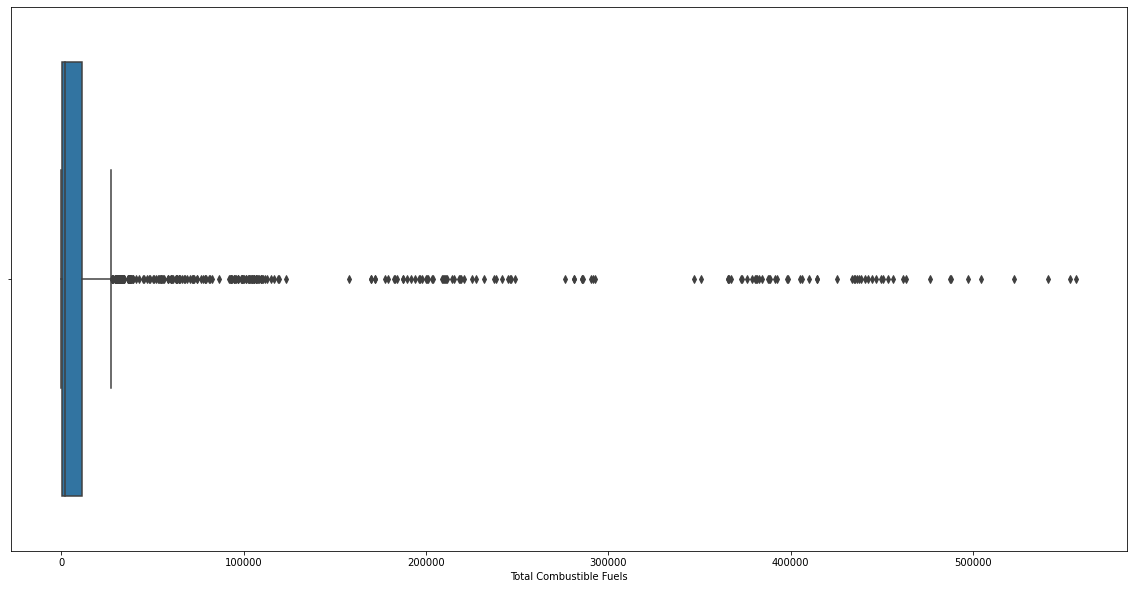

In [18]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(20)
sns.boxplot(energy['Total Combustible Fuels'])

<AxesSubplot:xlabel='Coal, Peat and Manufactured Gases'>

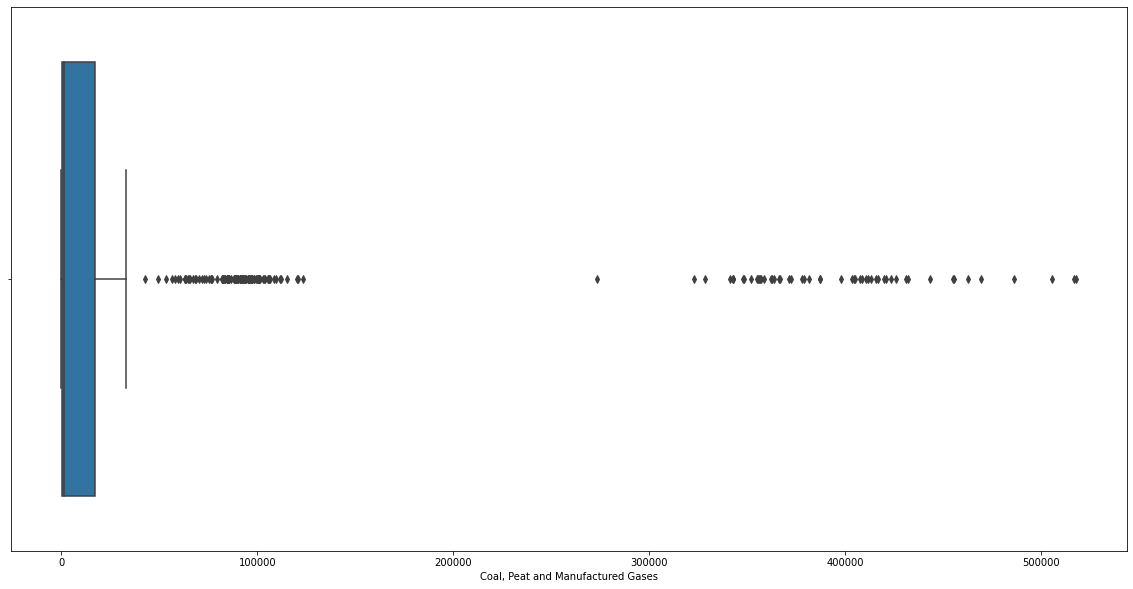

In [19]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(20)
sns.boxplot(energy['Coal, Peat and Manufactured Gases'])

<AxesSubplot:xlabel='Oil and Petroleum Products'>

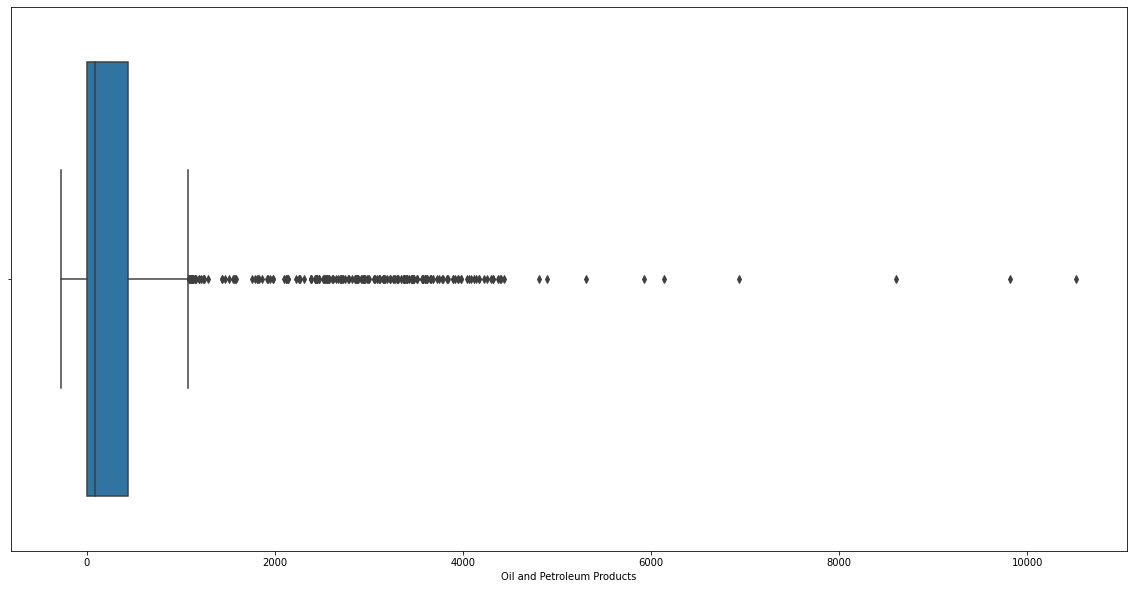

In [20]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(20)
sns.boxplot(energy['Oil and Petroleum Products'])

<AxesSubplot:xlabel='Natural Gas'>

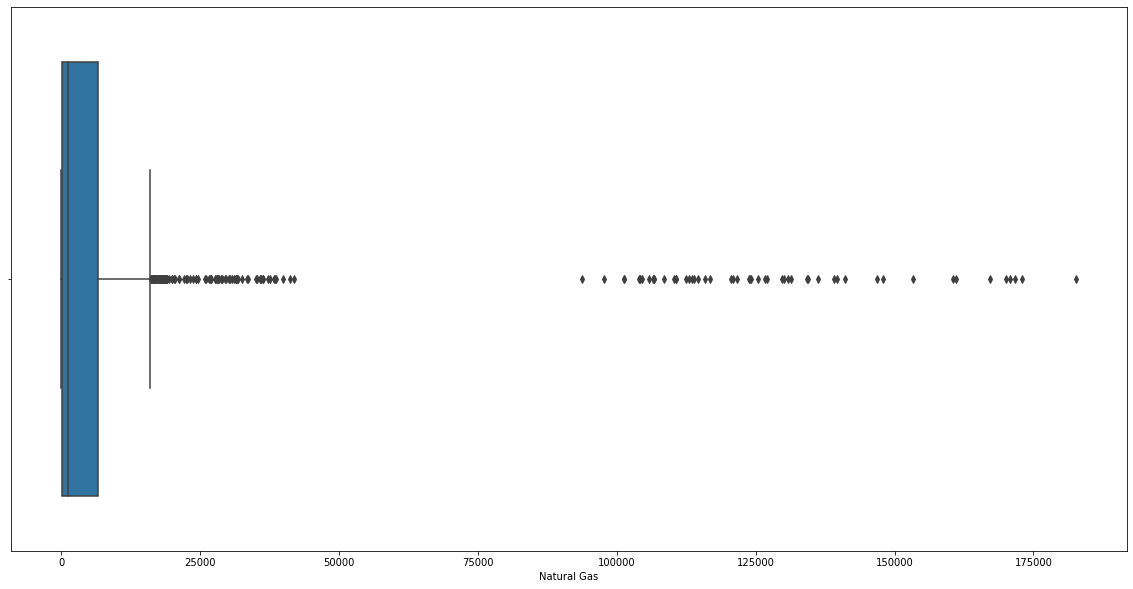

In [21]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(20)
sns.boxplot(energy['Natural Gas'])

<AxesSubplot:xlabel='Total Renewables (Geo, Solar, Wind, Other)'>

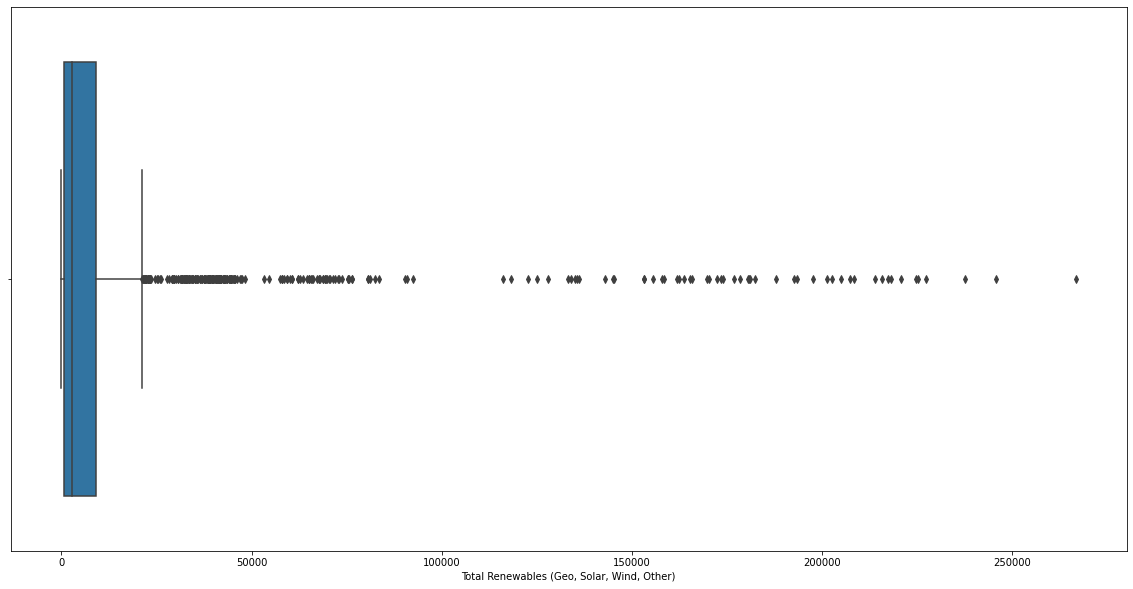

In [22]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(20)
sns.boxplot(energy['Total Renewables (Geo, Solar, Wind, Other)'])

In [23]:
energy.describe()

,Total Combustible Fuels,"Coal, Peat and Manufactured Gases",Oil and Petroleum Products,Natural Gas,"Total Renewables (Geo, Solar, Wind, Other)",Electricity
count,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000
mean,22143.324143,17271.599667,438.862363,6542.319997,11051.563126,35543.712280
std,69248.579222,59137.056759,881.900726,18895.315804,28117.777585,101967.612145
min,0.028600,0.025100,-267.081900,0.000000,9.963500,101.218400
25%,506.931700,291.904600,9.435450,177.389100,790.398500,2472.261000
50%,2139.092200,1419.400700,84.651400,1237.975600,2787.143600,6059.268000
75%,11400.561450,17271.599667,438.862363,6542.319997,8973.067450,22875.981100
max,556585.578800,518019.007100,10517.604400,182652.960600,266762.951300,772327.471600


# SARIMA Model

In [24]:
energy["Country"].unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Chile', 'Colombia',
       'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy',
       'Japan', 'Korea', 'Latvia', 'Lithuania', 'Luxembourg', 'Mexico',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
       'Republic of Turkiye', 'United Kingdom', 'United States',
       'Argentina', 'Brazil', 'Bulgaria', "People's Republic of China",
       'Croatia', 'Cyprus', 'India', 'Malta', 'North Macedonia',
       'Romania', 'Serbia'], dtype=object)

In [25]:
energy.groupby("Country")["Total Renewables (Geo, Solar, Wind, Other)"].count()

Country
Argentina                     54
Australia                     54
Austria                       54
Belgium                       54
Brazil                        54
Bulgaria                      54
Canada                        54
Chile                         54
Colombia                      54
Croatia                       54
Cyprus                        54
Czech Republic                54
Denmark                       53
Estonia                       56
Finland                       54
France                        53
Germany                       55
Greece                        54
Hungary                       54
Iceland                       54
India                         54
Ireland                       54
Italy                         54
Japan                         54
Korea                         54
Latvia                        54
Lithuania                     54
Luxembourg                    54
Malta                         54
Mexico                        54
Ne

In [26]:
df = energy[energy.Country=="India"].sort_values("Date")
df.head()

,Country,Date,Total Combustible Fuels,"Coal, Peat and Manufactured Gases",Oil and Petroleum Products,Natural Gas,"Total Renewables (Geo, Solar, Wind, Other)",Electricity
42,India,2018-01,106562.4095,96440.2668,648.4152,5067.7557,16340.0973,122363.0083
89,India,2018-02,98394.0176,89124.3056,618.8917,4663.1285,15320.4305,112961.0981
136,India,2018-03,110230.1212,100543.8825,662.3377,5252.5014,17808.1226,127299.7346
183,India,2018-04,106705.0086,97435.8111,652.5624,5825.1276,17720.0489,124800.3152
230,India,2018-05,109284.0833,100992.3469,534.1719,5932.4532,21422.1756,131935.7144


In [27]:
df = df.loc[:, df.columns.isin(['Date',"Total Renewables (Geo, Solar, Wind, Other)"])].reset_index(drop = True)
df.head()

,Date,"Total Renewables (Geo, Solar, Wind, Other)"
0,2018-01,16340.0973
1,2018-02,15320.4305
2,2018-03,17808.1226
3,2018-04,17720.0489
4,2018-05,21422.1756


In [28]:
df = df.groupby('Date')["Total Renewables (Geo, Solar, Wind, Other)"].sum().reset_index()
df.head()

,Date,"Total Renewables (Geo, Solar, Wind, Other)"
0,2018-01,16340.0973
1,2018-02,15320.4305
2,2018-03,17808.1226
3,2018-04,17720.0489
4,2018-05,21422.1756


In [29]:
df = df.set_index('Date')
df.index

Index(['2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
       '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
       '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
       '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
       '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
       '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
       '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
       '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12',
       '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06'],
      dtype='object', name='Date')

Text(0.5, 1.0, 'Total Renewables Energy in India Consumed from Jan 18 to Jun 2022')

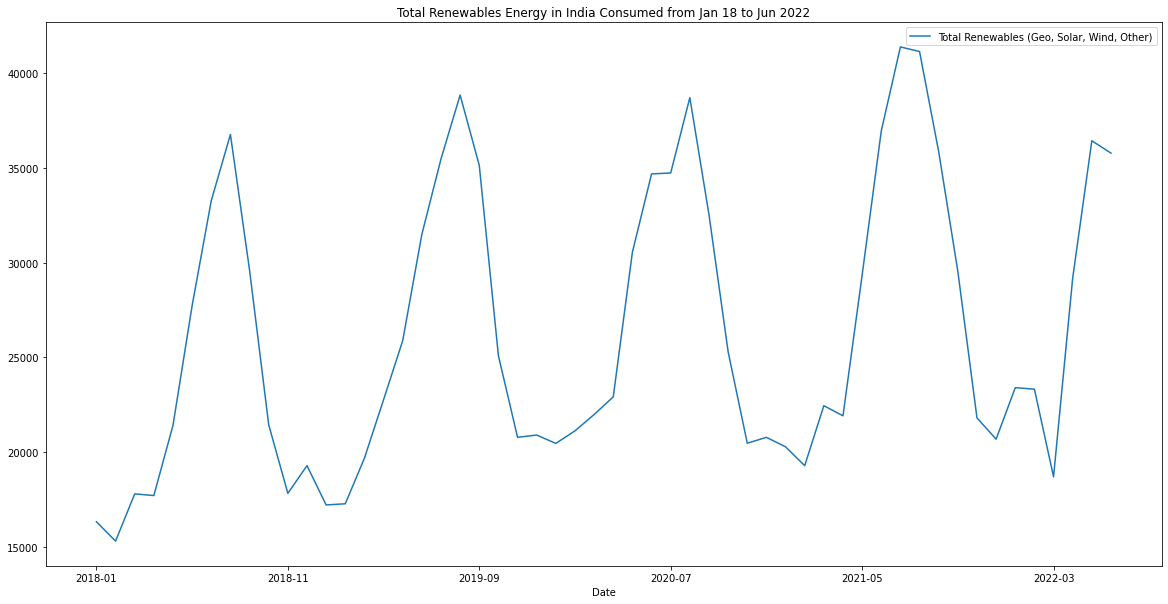

In [30]:
df.plot(figsize = (20,10))
plt.title("Total Renewables Energy in India Consumed from Jan 18 to Jun 2022")

In [31]:
y_train = df[:len(df)-11]
y_test = df[(len(df)-11):]

In [32]:
y_train[-2:]

,"Total Renewables (Geo, Solar, Wind, Other)"
Date,
2021-06,36929.5073
2021-07,41361.6612


<AxesSubplot:xlabel='Date'>

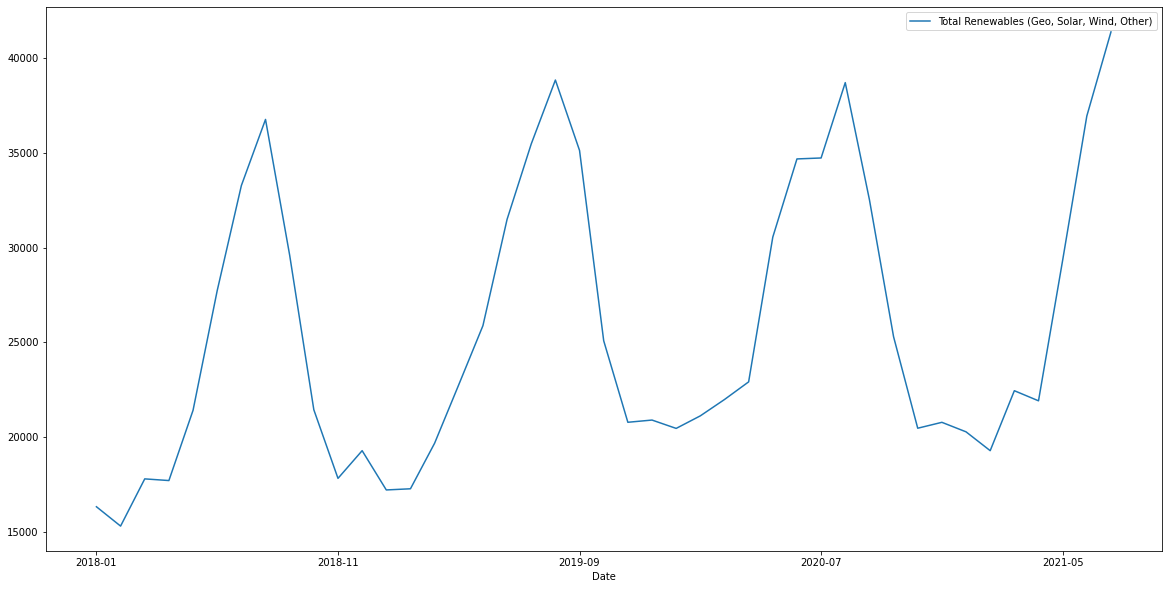

In [33]:
y_train.plot(figsize = (20,10))

<AxesSubplot:xlabel='Date'>

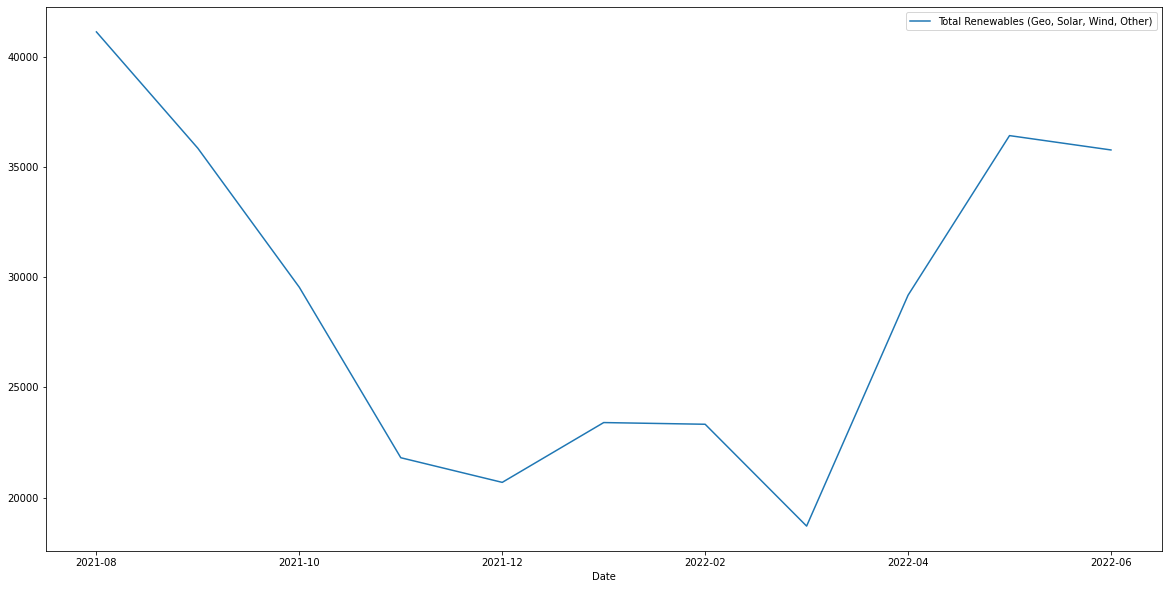

In [34]:
y_test.plot(figsize = (20,10))

# AdFuller test to check the stationary of if we need any transformations

In [35]:
result = adfuller(y_train)

print('ADF Statistics: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values: ')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))
# series is non- stationary and we cannot apply arima model

ADF Statistics: -1.736389
p-value: 0.412468
Critical Values: 
	1%: -3.654
	5%: -2.957
	10%: -2.618


*converting non-stationary model to stationary model*

<AxesSubplot:xlabel='Date'>

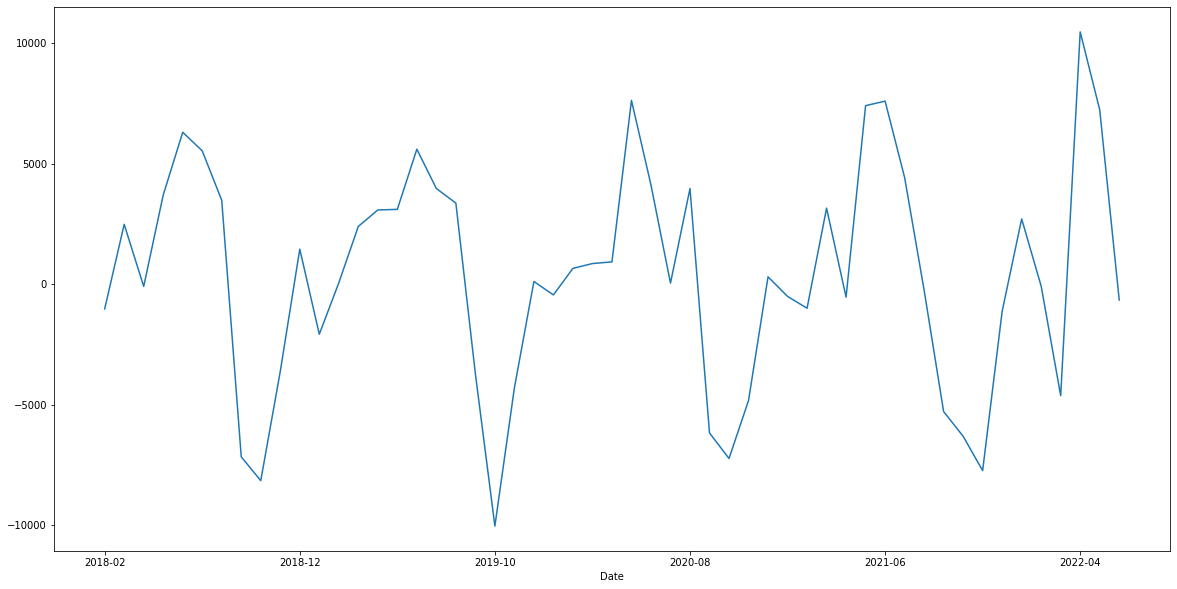

In [36]:
df['Total Renewables (Geo, Solar, Wind, Other)'] = df['Total Renewables (Geo, Solar, Wind, Other)'] - df['Total Renewables (Geo, Solar, Wind, Other)'].shift(1)
df['Total Renewables (Geo, Solar, Wind, Other)'].dropna().plot(figsize = (20,10))

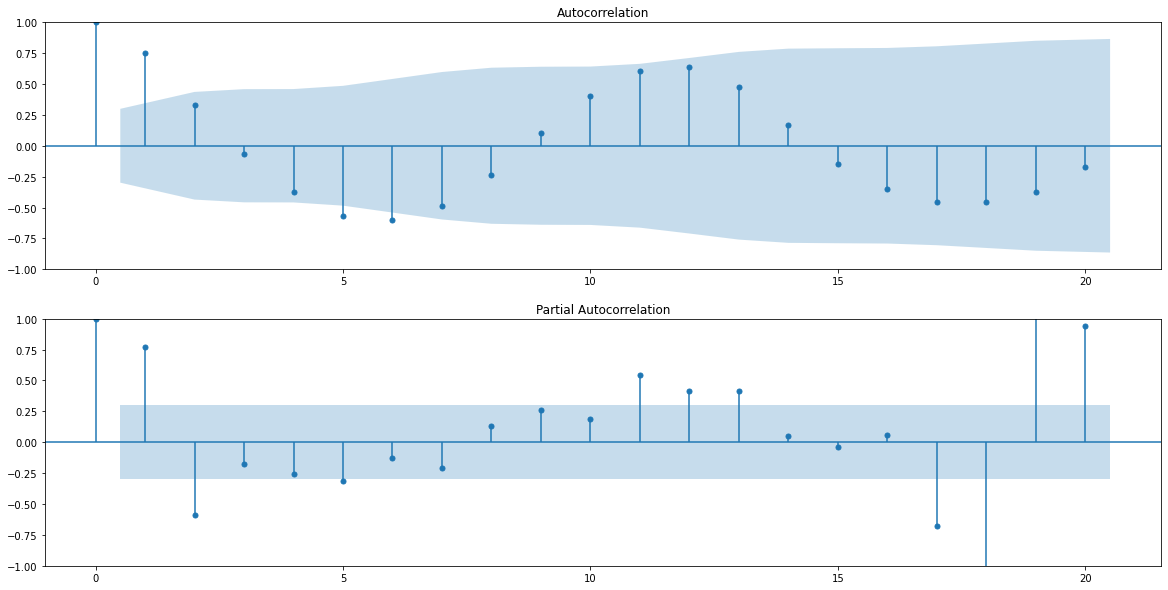

In [37]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, figsize = (20,10))
ax[0] = plot_acf(y_train, ax = ax[0], lags = 20)
ax[1] = plot_pacf(y_train, ax = ax[1], lags = 20)

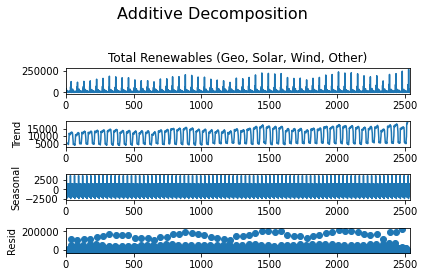

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose
additive_decomposition = seasonal_decompose(energy['Total Renewables (Geo, Solar, Wind, Other)'], model='additive', period=30)
additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

In [39]:
p = d = q = range(0, 2)

pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print("Example of parameter combinations for Seasonal ARIMA..")
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))
print('SARIMAX: {} x {}'.format(pdq[3], seasonal_pdq[5]))

Example of parameter combinations for Seasonal ARIMA..
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)
SARIMAX: (0, 1, 1) x (1, 0, 1, 12)


In [40]:
metric_aic_dict = dict()

for pm in pdq:
    for pm_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(y_train, order = pm,
                                             seasonal_ordee = pm_seasonal,
                                             enforce_stationary = False,
                                             enforce_invertibility = False)
            model_aic = model.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(pm, pm_seasonal, model_aic.aic))
            metric_aic_dict.update({(pm, pm_seasonal):model_aic.aic})
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1000.3141914374077
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1000.3141914374077
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1000.3141914374077
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1000.3141914374077
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1000.3141914374077
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1000.3141914374077
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1000.3141914374077
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1000.3141914374077
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:973.8663490619491
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:973.8663490619491
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:973.8663490619491
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:973.8663490619491
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:973.8663490619491
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:973.8663490619491
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:973.8663490619491
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:973.8663490619491
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:825.6050572357693
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:825.6050572357693
AR

In [41]:
{k: v for k, v in sorted(metric_aic_dict.items(),key = lambda x:  x[1])}

{((1, 1, 0), (0, 0, 0, 12)): 817.3867280011468,
 ((1, 1, 0), (0, 0, 1, 12)): 817.3867280011468,
 ((1, 1, 0), (0, 1, 0, 12)): 817.3867280011468,
 ((1, 1, 0), (0, 1, 1, 12)): 817.3867280011468,
 ((1, 1, 0), (1, 0, 0, 12)): 817.3867280011468,
 ((1, 1, 0), (1, 0, 1, 12)): 817.3867280011468,
 ((1, 1, 0), (1, 1, 0, 12)): 817.3867280011468,
 ((1, 1, 0), (1, 1, 1, 12)): 817.3867280011468,
 ((0, 1, 1), (0, 0, 0, 12)): 818.1224758493795,
 ((0, 1, 1), (0, 0, 1, 12)): 818.1224758493795,
 ((0, 1, 1), (0, 1, 0, 12)): 818.1224758493795,
 ((0, 1, 1), (0, 1, 1, 12)): 818.1224758493795,
 ((0, 1, 1), (1, 0, 0, 12)): 818.1224758493795,
 ((0, 1, 1), (1, 0, 1, 12)): 818.1224758493795,
 ((0, 1, 1), (1, 1, 0, 12)): 818.1224758493795,
 ((0, 1, 1), (1, 1, 1, 12)): 818.1224758493795,
 ((1, 1, 1), (0, 0, 0, 12)): 819.1396203594915,
 ((1, 1, 1), (0, 0, 1, 12)): 819.1396203594915,
 ((1, 1, 1), (0, 1, 0, 12)): 819.1396203594915,
 ((1, 1, 1), (0, 1, 1, 12)): 819.1396203594915,
 ((1, 1, 1), (1, 0, 0, 12)): 819.1396203

In [42]:
model = sm.tsa.statespace.SARIMAX(y_train,
                                order=(1, 1, 0),
                                seasonal_order=(1, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
model_aic = model.fit()

print(model_aic.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1379      0.212     -0.651      0.515      -0.553       0.277
ar.S.L12       0.9231      0.098      9.397      0.000       0.731       1.116
sigma2      4.427e+06   1.31e+06      3.384      0.001    1.86e+06    6.99e+06


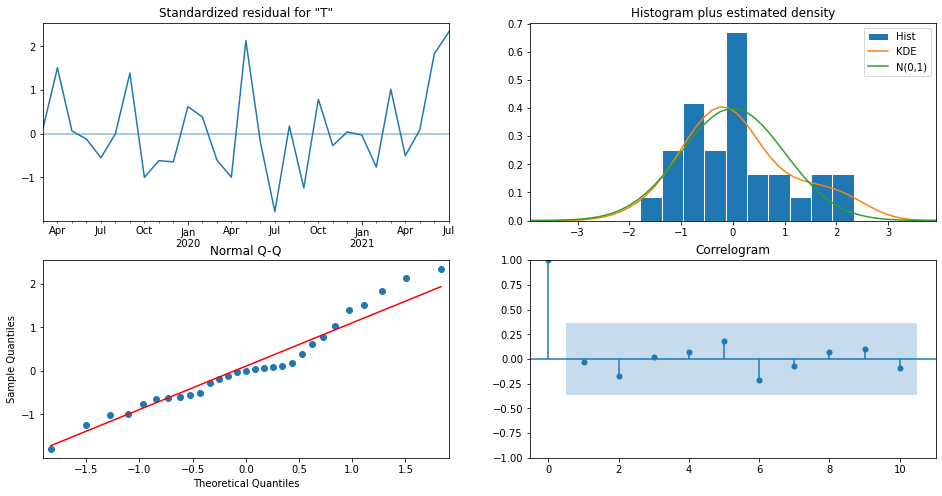

In [43]:
model_aic.plot_diagnostics(figsize=(16, 8))
plt.show()

In [44]:
forecast = model_aic.get_prediction(start = pd.to_datetime('2021-07-01'), dynamic = False)
predictions = forecast.predicted_mean

actual = y_test['2021-07-01':]

rmse = np.sqrt((predictions - actual) ** 2).mean()
print('The Root Mean Squared Error of outr forecasts is {}'.format(round(rmse, 2)))

The Root Mean Squared Error of outr forecasts is 2021-07-01 00:00:00                          NaN
Total Renewables (Geo, Solar, Wind, Other)   NaN
dtype: float64


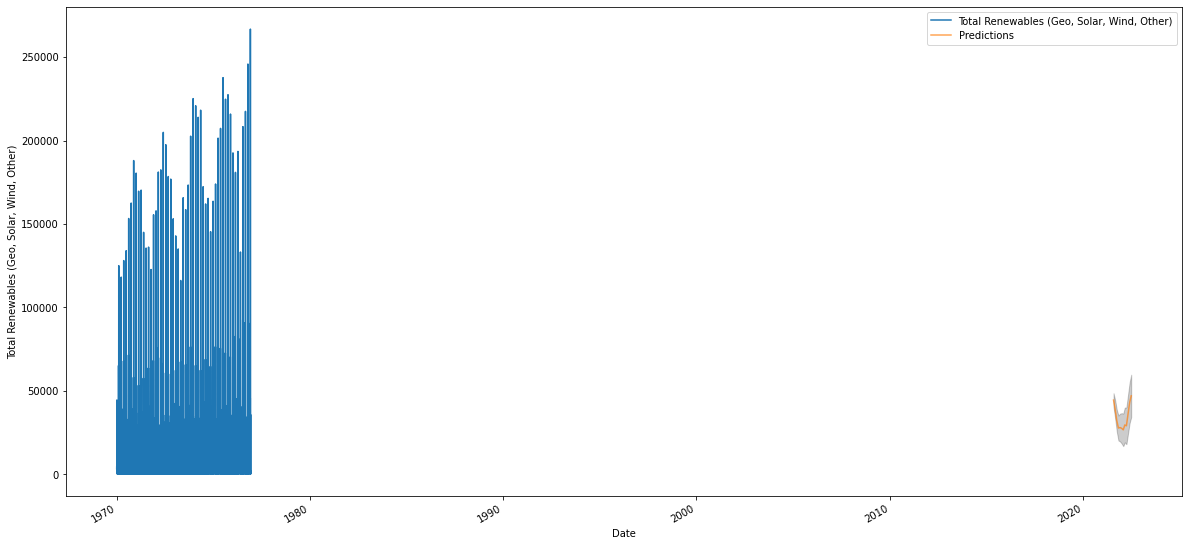

In [45]:
forecast = model_aic.get_forecast(steps = 12)

predictions = forecast.predicted_mean
ci = forecast.conf_int()

fig = y.plot(label = 'observed', figsize = (20, 10))
fig.set_xlabel('Date')
fig.set_ylabel('Total Renewables (Geo, Solar, Wind, Other)')
fig.fill_between(ci.index,
                ci.iloc[:, 0],
                ci.iloc[:, 1], color = 'k', alpha = .2)

predictions.plot(ax = fig, label = 'Predictions', alpha = .7, figsize=(20, 10))

plt.legend()
plt.show()

Text(0.5, 1.0, 'Total Renewables by Geo, Solar, Wind, Other -  used in India')

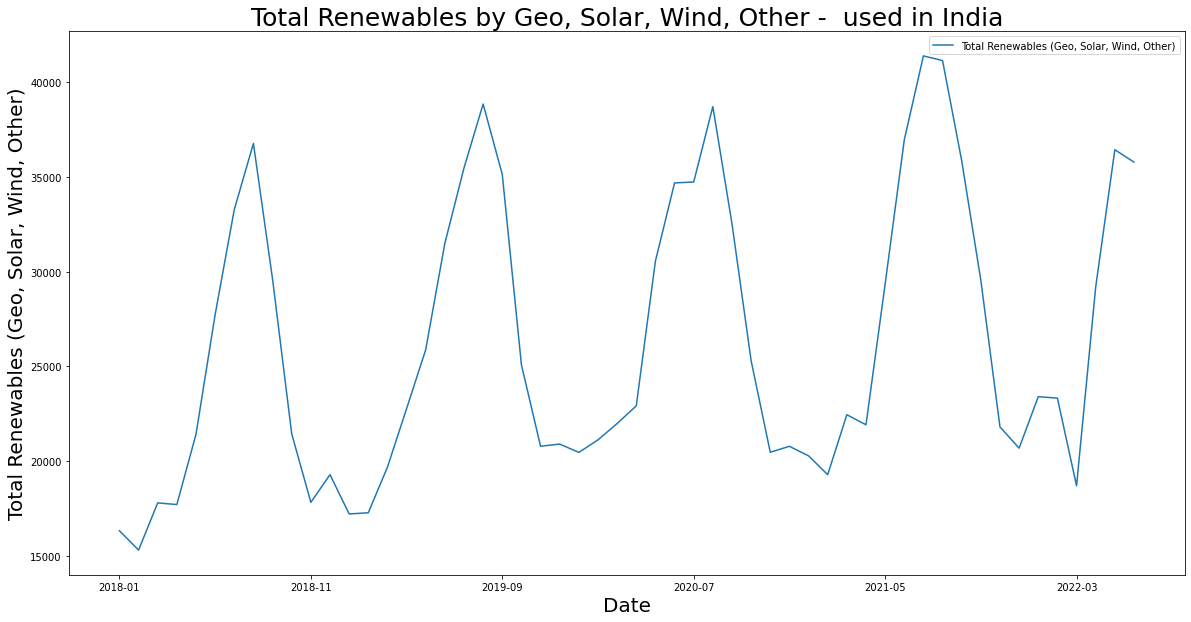

In [46]:
Jan18_Dec18 = energy[(energy['Country']== "India") & (energy['Date']>= "2018-01")]
Jan18_Dec18.plot(x="Date", y="Total Renewables (Geo, Solar, Wind, Other)", figsize = (20,10))
plt.xlabel("Date",  size = 20)
plt.ylabel("Total Renewables (Geo, Solar, Wind, Other)", size = 20)
plt.title("Total Renewables by Geo, Solar, Wind, Other -  used in India", size = 25)

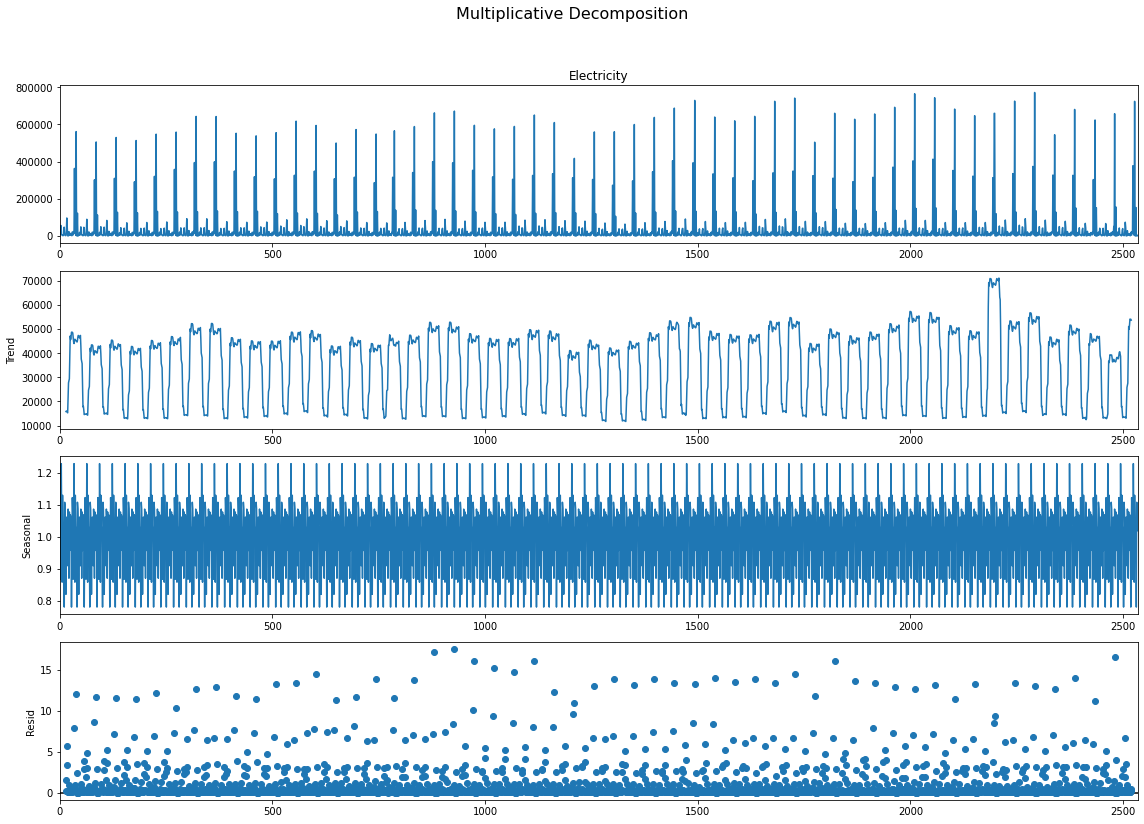

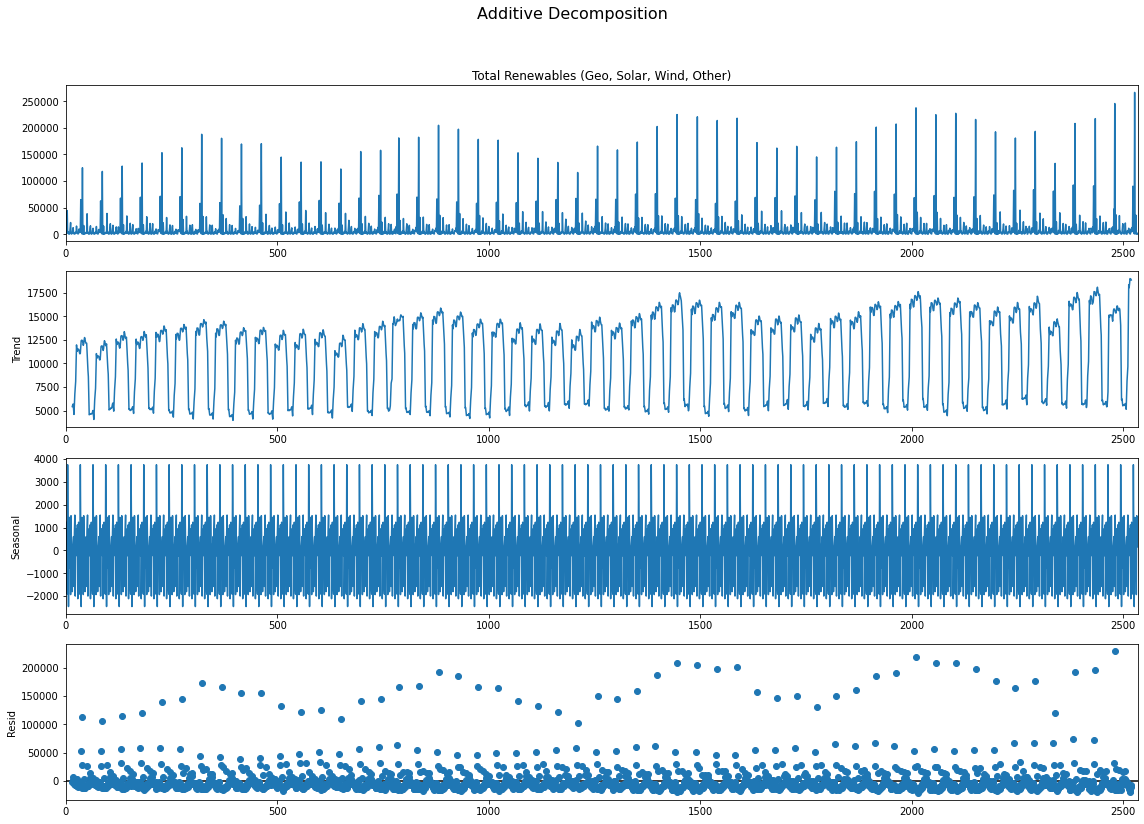

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(energy['Electricity'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(energy['Total Renewables (Geo, Solar, Wind, Other)'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

In [48]:
Jan18_Dec18 = energy[energy['Date']<="2018-12"]
Jan19_Dec19 = energy[(energy["Date"]<="2019-12") & (energy["Date"]>="2019-01")]
Jan20_Dec20 = energy[(energy["Date"]<="2020-12") & (energy["Date"]>="2020-01")]
Jan21_Dec21 = energy[(energy["Date"]<="2021-12") & (energy["Date"]>="2021-01")]
Jan22_Jun22 = energy[(energy["Date"]<="2022-06") & (energy["Date"]>="2022-01")]
Jan18_Dec22 = energy[(energy["Date"]>="2018-01") & (energy["Date"]<="2022-06")]

Text(0.5, 1.0, 'Electricity used in India from Jan 2022 - June 2022')

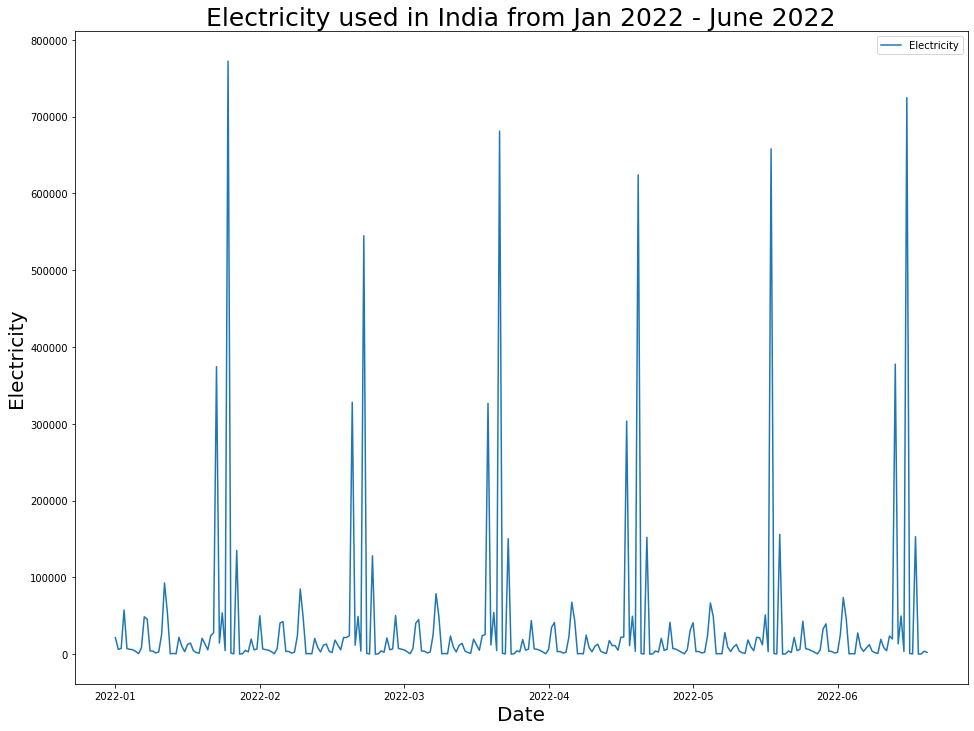

In [50]:
Jan22_Jun22.plot(x="Date", y="Electricity", figsize = (16,12))
plt.xlabel("Date",  size = 20)
plt.ylabel("Electricity", size = 20)
plt.title("Electricity used in India from Jan 2022 - June 2022", size = 25)